In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import math
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from icecream import ic
from sklearn.datasets import load_iris
import zipfile as zp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree


In [99]:
titanic_df=pd.read_csv("D:/HALDEN/downloads/titanic.csv")
ic(titanic_df.shape)
titanic_df.head(5)

ic| titanic_df.shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
len(titanic_df)

891

In [63]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
np.mean(titanic_df["Age"])

29.69911764705882

In [64]:
median=titanic_df["Age"].median()
titanic_df["Age"].fillna(median,inplace=True)



In [69]:
titanic_df.drop("Cabin",axis=1,inplace=True)

In [177]:
titanic_transform=titanic_df.dropna(axis=0)

In [102]:
titanic_transform.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [178]:
len(titanic_transform)

183

In [81]:
titanic_transform.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
len(new_titanic)

183

In [45]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=round(int(len(data)*test_ratio))
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [91]:
train_set,test_set=split_train_test(titanic_transform,0.2)

In [92]:
len(train_set)

712

In [93]:
len(test_set)

177

In [85]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier))& 0xfffffff < test_ratio*2*32

def split_train_test_by_id(data,test_ratio,_id_column):
    ids=data[_id_column]
    in_test_set=ids.apply(lambda id: test_set_check(id,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [176]:
train_set,test_set=train_test_split(titanic_transform,test_size=0.2,random_state=42)


In [97]:
len(test_set)

178

In [98]:
len(train_set)

711

In [108]:
titanic_transform.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [103]:
corr_matrix=titanic_transform.corr()

In [106]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
PassengerId    0.148495
Fare           0.134241
SibSp          0.106346
Parch          0.023582
Pclass        -0.034542
Age           -0.254085
Name: Survived, dtype: float64

there seems to be a strong negative correlation between those who survived and ther ages that means more of younger individuals survived

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='PassengerId', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='SibSp'>,
        <AxesSubplot:xlabel='PassengerId', ylabel='SibSp'>,
      

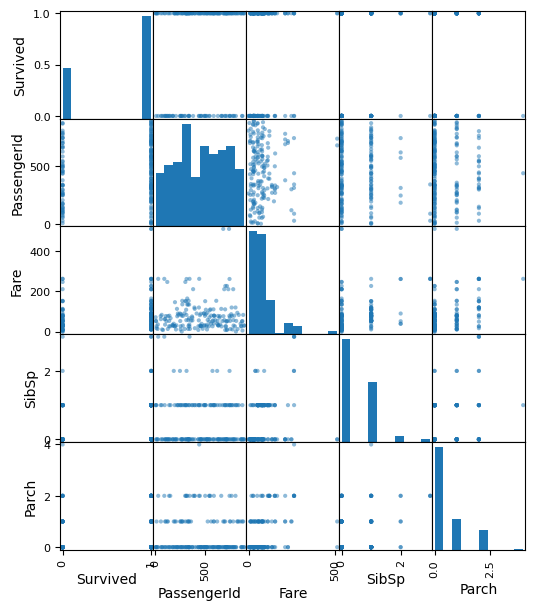

In [112]:
from pandas.plotting import scatter_matrix

attributes=['Survived','PassengerId','Fare','SibSp','Parch']
scatter_matrix(titanic_transform[attributes],figsize=(6,7))

In [123]:
titanic_emb=titanic_transform["Embarked"]
titanic_emb

1      C
3      S
6      S
10     S
11     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 183, dtype: object

In [115]:
from sklearn.preprocessing import LabelEncoder

ordinal_encoder=LabelEncoder()

In [124]:

titanic_emb_encoded=ordinal_encoder.fit_transform(titanic_emb)
titanic_emb_encoded[:10]



array([0, 2, 2, 2, 2, 2, 2, 2, 0, 0])

ML pipelines

In [129]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LogisticRegression

cat_encoder=OneHotEncoder()


In [127]:
titanic_num=list(titanic_transform.select_dtypes(exclude='object').columns)
titanic_cat=list(titanic_transform.select_dtypes(include='object').columns)

In [140]:
steps=[("Imputer",SimpleImputer(strategy="median")),
       ("standard_scaler",StandardScaler()),
       ("classifier",LogisticRegression())
       ]

In [141]:
steps

[('Imputer', SimpleImputer(strategy='median')),
 ('standard_scaler', StandardScaler()),
 ('classifier', LogisticRegression())]

In [143]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('standard_scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [144]:
from sklearn import set_config

In [145]:
set_config(display="diagram")

In [179]:
sex_le=ordinal_encoder.fit_transform(titanic_transform['Sex'])

In [180]:
titanic_transform["Sex_le"]=sex_le

C:\Users\HALDEN\AppData\Local\Temp\ipykernel_30700\1744815356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_transform["Sex_le"]=sex_le


In [184]:
titanic_transform.drop(["Sex","Ticket","Embarked"],axis=1,inplace=True)

C:\Users\HALDEN\AppData\Local\Temp\ipykernel_30700\1472361157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_transform.drop(["Sex","Ticket","Embarked"],axis=1,inplace=True)


In [182]:
titanic_transform["Embarked_le"]=titanic_emb_encoded

C:\Users\HALDEN\AppData\Local\Temp\ipykernel_30700\2573054391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_transform["Embarked_le"]=titanic_emb_encoded


In [186]:
titanic_transform.drop(["Name"],axis=1,inplace=True)

C:\Users\HALDEN\AppData\Local\Temp\ipykernel_30700\2572905182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_transform.drop(["Name"],axis=1,inplace=True)


In [187]:
titanic_transform

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_le
1,2,1,1,38.0,1,0,71.2833,0,0
3,4,1,1,35.0,1,0,53.1000,0,2
6,7,0,1,54.0,0,0,51.8625,1,2
10,11,1,3,4.0,1,1,16.7000,0,2
11,12,1,1,58.0,0,0,26.5500,0,2
...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,0,2
872,873,0,1,33.0,0,0,5.0000,1,2
879,880,1,1,56.0,0,1,83.1583,0,0
887,888,1,1,19.0,0,0,30.0000,0,2


In [189]:
x=titanic_transform.drop("Survived",axis=1)
y=titanic_transform.Survived

In [190]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_le
1,2,1,38.0,1,0,71.2833,0,0
3,4,1,35.0,1,0,53.1000,0,2
6,7,1,54.0,0,0,51.8625,1,2
10,11,3,4.0,1,1,16.7000,0,2
11,12,1,58.0,0,0,26.5500,0,2
...,...,...,...,...,...,...,...,...
871,872,1,47.0,1,1,52.5542,0,2
872,873,1,33.0,0,0,5.0000,1,2
879,880,1,56.0,0,1,83.1583,0,0
887,888,1,19.0,0,0,30.0000,0,2


In [191]:
len(y)

183

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [213]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('standard_scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [194]:
y_pred=pipe.predict(x_test)

In [196]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_le
118,119,1,24.00,0,1,247.5208,1,0
251,252,3,29.00,1,1,10.4625,0,2
742,743,1,21.00,2,2,262.3750,0,0
544,545,1,50.00,1,0,106.4250,1,0
712,713,1,48.00,1,0,52.0000,1,2
96,97,1,71.00,0,0,34.6542,1,0
139,140,1,24.00,0,0,79.2000,1,0
337,338,1,41.00,0,0,134.5000,0,0
577,578,1,39.00,1,0,55.9000,0,2
492,493,1,55.00,0,0,30.5000,1,2


In [195]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [197]:
pipe.score(x_test,y_test)

0.7297297297297297

In [198]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC



In [223]:
steps2=[
    ("Imputer",SimpleImputer(strategy="median")),
    ("scaling",StandardScaler()),
    ("PCA", PCA(n_components=5)),
    ("SVC",SVC())]

In [224]:
pip2=Pipeline(steps2)

In [225]:
pip2

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler()), ('PCA', PCA(n_components=5)),
                ('SVC', SVC())])

In [212]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_le
331,332,1,45.5,0,0,28.5000,1,2
336,337,1,29.0,1,0,66.6000,1,2
193,194,2,3.0,1,1,26.0000,1,2
75,76,3,25.0,0,0,7.6500,1,2
248,249,1,37.0,1,1,52.5542,1,2
...,...,...,...,...,...,...,...,...
520,521,1,30.0,0,0,93.5000,0,2
92,93,1,46.0,1,0,61.1750,1,2
460,461,1,48.0,0,0,26.5500,1,2
872,873,1,33.0,0,0,5.0000,1,2


In [226]:
try:
    pip2.fit(x_train,y_train)
    
except:
    print("something went wrong")

In [227]:
pip2.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [228]:
pip2.score(x_test,y_test)

0.7027027027027027

In [229]:
from sklearn.ensemble import RandomForestRegressor

forrestreg=RandomForestRegressor()


In [230]:
forrestreg.fit(x_test,y_test)


RandomForestRegressor()

In [231]:
forrestreg.score(x_test,y_test)

0.8828524844720497

In [232]:
forrestreg.predict(x_test)

array([0.12, 0.34, 0.94, 0.15, 0.85, 0.05, 0.17, 0.88, 0.93, 0.03, 0.03,
       0.84, 0.26, 0.98, 0.03, 0.64, 0.99, 0.65, 0.74, 0.99, 0.99, 0.98,
       0.88, 0.84, 0.01, 1.  , 0.93, 0.07, 0.89, 0.82, 0.96, 0.79, 0.35,
       1.  , 0.25, 0.22, 1.  ])

In [234]:
y_test

118    0
251    0
742    1
544    0
712    1
96     0
139    0
337    1
577    1
492    0
487    0
765    1
339    0
835    1
262    0
97     1
291    1
209    1
429    1
307    1
779    1
609    1
707    1
183    1
54     0
618    1
318    1
110    0
717    1
556    1
369    1
305    1
583    0
710    1
332    0
177    0
853    1
Name: Survived, dtype: int64

In [233]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_le
118,119,1,24.00,0,1,247.5208,1,0
251,252,3,29.00,1,1,10.4625,0,2
742,743,1,21.00,2,2,262.3750,0,0
544,545,1,50.00,1,0,106.4250,1,0
712,713,1,48.00,1,0,52.0000,1,2
96,97,1,71.00,0,0,34.6542,1,0
139,140,1,24.00,0,0,79.2000,1,0
337,338,1,41.00,0,0,134.5000,0,0
577,578,1,39.00,1,0,55.9000,0,2
492,493,1,55.00,0,0,30.5000,1,2
